# 📷 OpenCV Rectangle Drawing – Learning Notebook

## Overview
This notebook is part of my **OpenCV learning roadmap**.  
The goal is to practice basic image manipulation tasks in OpenCV, starting with:
- Loading and displaying an image
- Resizing large images while keeping the aspect ratio
- Drawing rectangles on images (hard-coded and interactively)
- **New**: Adding text annotations with style control
- Visualizing results with Matplotlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# helper to show BGR images nicely in Jupyter
def show_bgr(img, figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

original shape (height, width, channels): (1080, 1920, 3)


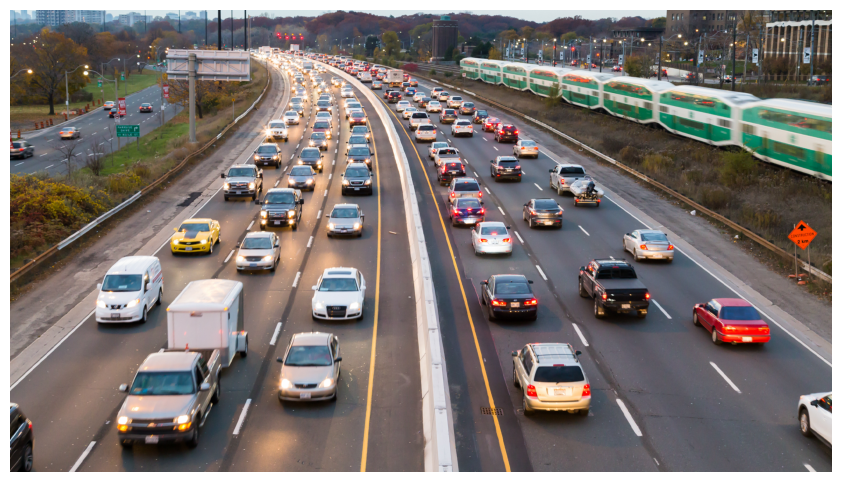

In [3]:
img = cv2.imread('./data/Highway-Toronto-traffic.jpg')
if img is None:
    raise FileNotFoundError("File not found — check the path './data/Highway-Toronto-traffic.jpg'")
h, w = img.shape[:2]
print("original shape (height, width, channels):", img.shape)
# optionally preview (may be large)
show_bgr(img, figsize=(12,6))


resized shape: (506, 900, 3) scale_x: 0.46875


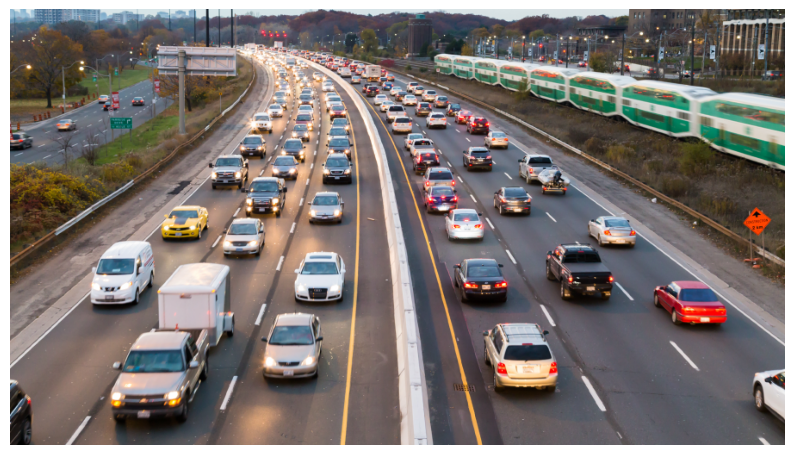

In [4]:
def resize_keep_aspect(img, max_width=None, max_height=None):
    h, w = img.shape[:2]
    scale = 1.0
    if max_width and w > max_width:
        scale = max_width / w
    if max_height and h * scale > max_height:
        # if both provided, ensure height also fits
        scale = min(scale, max_height / h)
    if scale == 1.0:
        return img.copy(), 1.0, 1.0
    new_w = int(w * scale)
    new_h = int(h * scale)
    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    return resized, scale, scale  # scale_x, scale_y (same here)

# example: limit width to 900 pixels
resized, scale_x, scale_y = resize_keep_aspect(img, max_width=900)
print("resized shape:", resized.shape, "scale_x:", scale_x)
show_bgr(resized)


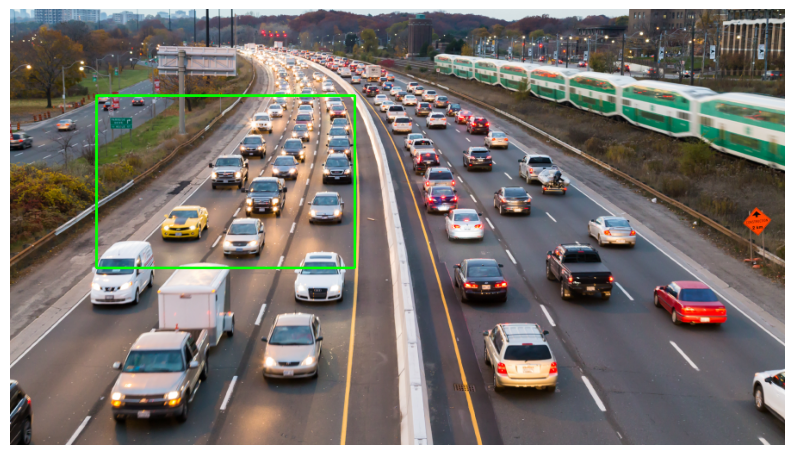

In [5]:
# hard-coded rectangle (x1,y1) top-left and (x2,y2) bottom-right
pt1 = (100, 100)   # change these as needed (x,y)
pt2 = (400, 300)

img_rect = resized.copy()
cv2.rectangle(img_rect, pt1, pt2, (0, 255, 0), thickness=2)  # BGR color, thickness in px
show_bgr(img_rect)


## <font style="color:black">Adding Text</font>


Finally, let's see how we can write some text on an image using **cv2.putText** function.

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.
2. `text`: Text string to be written.
3. `org`: Bottom-left corner of the text string in the image.
4. `fontFace`: Font type
5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.
6. `color`: Font color
 
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.
2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`putText:`**https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576
    
Let's see an example of this.

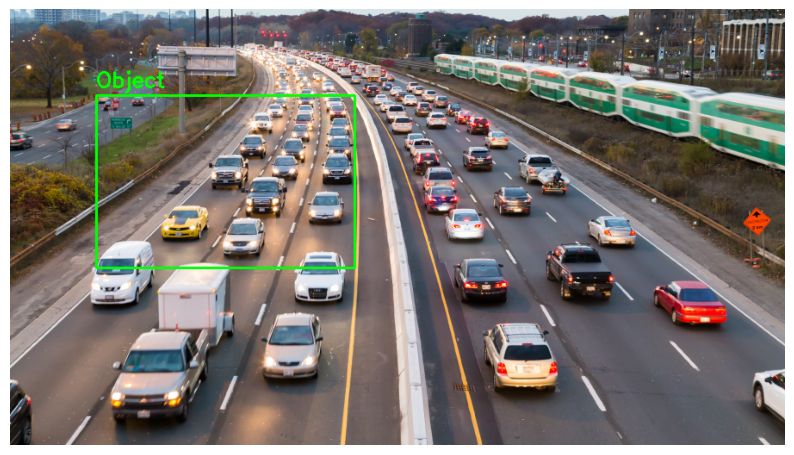

In [6]:
# Add this after your rectangle drawing code
img_rect = resized.copy()
cv2.rectangle(img_rect, pt1, pt2, (0, 255, 0), thickness=2)

# TEXT ANNOTATION
text = "Object"  # Your label text
text_position = (pt1[0], pt1[1] - 10)  # 10px above rectangle
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
text_color = (0, 255, 0)  # Green (BGR format)
text_thickness = 2

cv2.putText(img_rect, text, text_position, font, 
            font_scale, text_color, text_thickness)

show_bgr(img_rect)